# Housing Prices Data Set - Regression Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv('house_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data = data[['LotArea', 'LotFrontage', 'OverallCond', 'Street', 'Neighborhood', '1stFlrSF', 'GrLivArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']]
data.head()

,LotArea,LotFrontage,OverallCond,Street,Neighborhood,1stFlrSF,GrLivArea,OverallQual,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,8450,65.0,5,Pave,CollgCr,856,1710,7,2003,2003,2008,208500
1,9600,80.0,8,Pave,Veenker,1262,1262,6,1976,1976,2007,181500
2,11250,68.0,5,Pave,CollgCr,920,1786,7,2001,2002,2008,223500
3,9550,60.0,5,Pave,Crawfor,961,1717,7,1915,1970,2006,140000
4,14260,84.0,5,Pave,NoRidge,1145,2198,8,2000,2000,2008,250000


In [8]:
data = data.dropna()
data.shape

(1201, 12)

In [10]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) in ['LotArea', 'LotFrontage', 'OverallCond', '1stFlrSF', 'GrLivArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'YrSold']):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [11]:
data = normalize(data)
data.head()

,LotArea,LotFrontage,OverallCond,Street,Neighborhood,1stFlrSF,GrLivArea,OverallQual,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,0.033420,0.150685,0.428571,Pave,CollgCr,0.119780,0.259231,0.666667,0.949275,0.883333,0.50,208500
1,0.038795,0.202055,0.857143,Pave,Veenker,0.212942,0.174830,0.555556,0.753623,0.433333,0.25,181500
2,0.046507,0.160959,0.428571,Pave,CollgCr,0.134465,0.273549,0.666667,0.934783,0.866667,0.50,223500
3,0.038561,0.133562,0.428571,Pave,Crawfor,0.143873,0.260550,0.666667,0.311594,0.333333,0.00,140000
4,0.060576,0.215753,0.428571,Pave,NoRidge,0.186095,0.351168,0.777778,0.927536,0.833333,0.50,250000


In [12]:
X = data.drop(columns = ['SalePrice'])
Y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(960, 11) (960,)
(241, 11) (241,)


### Model - 'LotArea'

In [13]:
train_la = x_train['LotArea'].values.reshape(-1, 1)
test_la = x_test['LotArea'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(train_la, y_train)

LinearRegression()

In [14]:
print('Model - [LotArea]')
print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Model - [LotArea]
Coefficient:  [692942.23937643]
Intercept:  153358.37414014598


### Model 1 -  'LotArea', 'LotFrontage'

In [15]:
train_m1 = x_train[['LotArea', 'LotFrontage']]
test_m1 = x_test[['LotArea', 'LotFrontage']]
model1 = LinearRegression()
model1.fit(train_m1, y_train)

LinearRegression()

In [16]:
print('Model 1 - [LotArea, LotFrontage]')
train_pred = model1.predict(train_m1)
test_pred = model1.predict(test_m1)
md1_val_mse_test = mean_squared_error(y_test, test_pred);
md1_val_mse_train = mean_squared_error(y_train, train_pred);
print('Coefficients: ', model1.coef_)

Model 1 - [LotArea, LotFrontage]
Coefficients:  [463494.03313971 277017.17862297]


### Model 2 - 'LotArea', 'LotFrontage', 'OverallCond', 'OverallQual'

In [ ]:
train_m2 = x_train[['LotArea', 'LotFrontage', 'OverallCond', 'OverallQual']]
test_m2 = x_test[['LotArea', 'LotFrontage', 'OverallCond', 'OverallQual']]
model2 = LinearRegression()
model2.fit(train_m2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model 2 - [LotArea, LotFrontage, OverallCond, OverallQual]')
train_pred = model2.predict(train_m2)
test_pred = model2.predict(test_m2)
md2_val_mse_test = mean_squared_error(y_test, test_pred);
md2_val_mse_train = mean_squared_error(y_train, train_pred);
print('Coefficients: ', model2.coef_)

Model 2 - [LotArea, LotFrontage, OverallCond, OverallQual]
Coefficients:  [613201.67339264  76097.38127866  -1824.0576519  390922.66303998]


### Model 3 - 'LotArea', 'LotFrontage', 'OverallCond', 'OverallQual', '1stFlrSF', 'GrLivArea'

In [ ]:
train_m3 = x_train[['LotArea', 'LotFrontage', 'OverallCond', 'OverallQual', '1stFlrSF', 'GrLivArea',]]
test_m3 = x_test[['LotArea', 'LotFrontage', 'OverallCond', 'OverallQual', '1stFlrSF', 'GrLivArea',]]
model3 = LinearRegression()
model3.fit(train_m3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model 3 - [LotArea, LotFrontage, OverallCond, OverallQual, 1stFlrSF, GrLivArea]')
train_pred = model3.predict(train_m3)
test_pred = model3.predict(test_m3)
md3_val_mse_test = mean_squared_error(y_test, test_pred);
md3_val_mse_train = mean_squared_error(y_train, train_pred);
print('Coefficients: ', model3.coef_)

Model 3 - [LotArea, LotFrontage, OverallCond, OverallQual, 1stFlrSF, GrLivArea]
Coefficients:  [257549.4802527   -4683.57479543   7630.44237983 284732.94047946
 152860.7105846  229847.2049926 ]


### Comparisons

In [ ]:
la_mse_test = []
la_mse_test.append(md1_val_mse_test)
la_mse_test.append(md2_val_mse_test)
la_mse_test.append(md3_val_mse_test)
la_mse_train = []
la_mse_train.append(md1_val_mse_train)
la_mse_train.append(md2_val_mse_train)
la_mse_train.append(md3_val_mse_train)
print(la_mse_test)

[7782170883.302836, 2642057786.8512316, 1824498245.1149259]


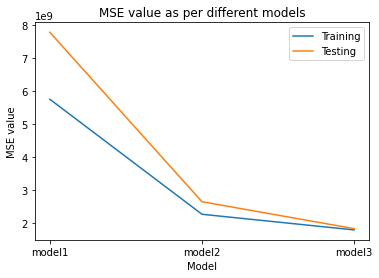

In [ ]:
plt.title('MSE value as per different models')
plt.xlabel('Model')
plt.ylabel('MSE value')
plt.plot(['model1', 'model2', 'model3'], la_mse_train,label = 'Training')
plt.plot(['model1', 'model2', 'model3'], la_mse_test,label = 'Testing')
plt.legend()
plt.show()

In [ ]:
r2_test = []
r2_train = []
r2_train.append( model1.score(train_m1, y_train))
r2_train.append( model2.score(train_m2, y_train))
r2_train.append( model3.score(train_m3, y_train))
r2_test.append(model1.score(test_m1, y_test))
r2_test.append(model2.score(test_m2, y_test))
r2_test.append(model3.score(test_m3, y_test))

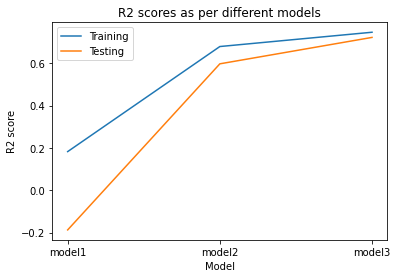

In [ ]:
plt.title('R2 scores as per different models')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.plot(['model1', 'model2', 'model3'], r2_train,label = 'Training')
plt.plot(['model1', 'model2', 'model3'], r2_test,label = 'Testing')
plt.legend()
plt.show()

### One Hot Encoding

In [ ]:
street = data['Street'].values.reshape(-1, 1)
neigh = data['Neighborhood'].values.reshape(-1, 1)
ohe = OneHotEncoder()
street_ohe = ohe.fit_transform(street)
neigh_ohe = ohe.fit_transform(neigh)

### Model 4 - 'LotArea', 'Street'

In [ ]:
model4_x = hstack((data['LotArea'].values.reshape(-1, 1), street_ohe))

In [ ]:
x_train_m4, x_test_m4, y_train_m4, y_test_m4 = train_test_split(model4_x, Y, test_size = 0.2)
print(x_train_m4.shape, y_train_m4.shape)
print(x_test_m4.shape, y_test_m4.shape)

(960, 3) (960,)
(241, 3) (241,)


In [ ]:
model4 = LinearRegression()
model4.fit(x_train_m4, y_train_m4)
print('Model 4 - [LotArea, Street]')
train_pred = model4.predict(x_train_m4)
test_pred = model4.predict(x_test_m4)
print('Coefficients: ', model4.coef_)

Model 4 - [LotArea, Street]
Coefficients:  [646890.40452625 -33864.85405796  33864.85405796]


### Model 5 - 'LotArea', 'OverallCond', 'Street', 'Neighborhood'

In [ ]:
numerical = data[['LotArea', 'OverallCond']]
model5_x = hstack((numerical, street_ohe, neigh_ohe))
print(model5_x.shape)

(1201, 29)


In [ ]:
x_train_m5, x_test_m5, y_train_m5, y_test_m5 = train_test_split(model5_x, Y, test_size = 0.2)
print(x_train_m5.shape, y_train_m5.shape)
print(x_test_m5.shape, y_test_m5.shape)

(960, 29) (960,)
(241, 29) (241,)


In [ ]:
model5 = LinearRegression()
model5.fit(x_train_m5, y_train_m5)
print('Model 5 - [LotArea, OverallCond, Street, Neighborhood]')
train_pred = model5.predict(x_train_m5)
test_pred = model5.predict(x_test_m5)
print('Coefficients: ', model5.coef_)

Model 5 - [LotArea, OverallCond, Street, Neighborhood]
Coefficients:  [393241.27290969  46630.1496338   -8765.04528672   8765.04528673
  27443.75877913 -34554.68214248 -62082.57325777 -60493.30520954
  -3818.32926193  17927.9831375   11160.32502431 -60156.9557187
   7957.78530141 -77876.02418201 -73193.4529532  -26944.88526015
 -39235.36387957 -25071.20430749  -4750.25233583 147859.58305708
 136031.92306941 -60173.61668647 -41547.8377744  -50248.82941272
   9237.29738315  46333.03623781 105159.86703751  52694.22610362
  58341.52725131]


### Model 6 - 'LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'YrSold'

In [ ]:
numerical = data[['LotArea', 'OverallCond', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']]
model6_x = hstack((numerical, street_ohe, neigh_ohe))
print(model6_x.shape)

(1201, 33)


In [ ]:
x_train_m6, x_test_m6, y_train_m6, y_test_m6 = train_test_split(model6_x, Y, test_size = 0.2)
print(x_train_m6.shape, y_train_m6.shape)
print(x_test_m6.shape, y_test_m6.shape)

(960, 33) (960,)
(241, 33) (241,)


In [ ]:
model6 = LinearRegression()
model6.fit(x_train_m6, y_train_m6)
print('Model 6 - [LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, YearBuilt, YearRemodAdd, YrSold]')
train_pred = model6.predict(x_train_m6)
test_pred = model6.predict(x_test_m6)
print('Coefficients: ', model6.coef_)

Model 6 - [LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, YearBuilt, YearRemodAdd, YrSold]
Coefficients:  [ 2.78862102e+05  5.47490545e+04  3.15155895e+05  6.09128812e+04
  2.53497473e+04 -4.81588118e+03 -1.45230095e+04  1.45230095e+04
 -1.96359540e+04 -4.80979577e+03 -2.21746866e+04 -1.80460725e+04
 -1.57135585e+04 -6.71909247e+03  2.41749982e+04 -4.33788078e+04
 -1.37223093e+02 -3.08002620e+04 -4.33511707e+04 -4.43348091e+04
 -3.25925492e+04 -1.19967704e+04 -1.58669417e+04  1.20263667e+05
  7.99481049e+04 -2.23398612e+04 -9.38003165e+03 -4.34031689e+04
 -8.08212703e+03  2.45948344e+04  1.00397205e+05  1.57828944e+04
  2.76011782e+04]


### Comparison

In [ ]:
la_weights = []
la_weights.append(model1.coef_[0])
la_weights.append(model2.coef_[0])
la_weights.append(model3.coef_[0])
la_weights.append(model4.coef_[0])
la_weights.append(model5.coef_[0])
la_weights.append(model6.coef_[0])
print(la_weights)

[943421.1185378005, 613201.6733926391, 257549.48025270342, 646890.4045262489, 393241.27290969295, 278862.1016856336]


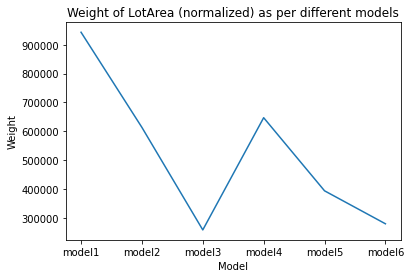

In [ ]:
plt.title('Weight of LotArea (normalized) as per different models')
plt.xlabel('Model')
plt.ylabel('Weight')
plt.plot(['model1', 'model2', 'model3', 'model4', 'model5', 'model6'], la_weights)
plt.show()

### Polynomial Regression using LotArea

In [ ]:
degree=2
poly_features = PolynomialFeatures(degree = 2)
train_la_poly = poly_features.fit_transform(train_la)
polyreg = LinearRegression()
polyreg.fit(train_la_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model with degree 2 - [LotArea]')
print('Coefficient:' , polyreg.coef_)

Model with degree 2 - [LotArea]
Coefficient: [       0.          2651971.43467082 -6801487.55428714]


In [ ]:
degree=2
poly_features = PolynomialFeatures(degree = 3)
train_la_poly = poly_features.fit_transform(train_la)
polyreg = LinearRegression()
polyreg.fit(train_la_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Model with degree 3 - [LotArea]')
print('Coefficient:' , polyreg.coef_)

Model with degree 3 - [LotArea]
Coefficient: [       0.          2540633.12624487 -5283551.67058331 -4048218.68401332]
